In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
np.random.seed(19680801)

In [3]:
def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-0.5, 0.75, "o"), (0.75, 1.0, "s")]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls="none", marker=marker)
    
    ax.set_xlabel("x-label")
    ax.set_title("axes title")
    return ax

In [4]:
def plot_colored_lines(ax):
    """Plot lines with colors following the style color cycle."""
    t = np.linspace(-10, 10, 100)
    
    def sigmoid(t, t0):
        return 1 / (1 + np.exp(-(t - t0)))
    
    nb_colors = len(plt.rcParams["axes.prop_cycle"])
    shifts = np.linspace(-5, 5, nb_colors)
    amplitudes = np.linspace(1, 1.5, nb_colors)
    for t0, a in zip(shifts, amplitudes):
        ax.plot(t, a * sigmoid(t, t0), "-")
    ax.set_xlim(-10, 10)
    return ax

In [5]:
def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color="C2")
    ax.set_xticks(x + width, labels=["a", "b", "c", "d", "e"])
    return ax

In [6]:
def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.
    
    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams["axes.prop_cycle"], range(nb_samples)):
        ax.add_patch(
            plt.Circle(
                prng.normal(
                    scale=3, size=2),
                    radius=1.0, color=sty_dict["color"]
                )
            )
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect("equal", adjustable="box")  # to plot circles as circles
    return ax

In [7]:
def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch."""
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation="none")
    c = plt.Circle((5, 5), radius=5, label="patch")
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

In [8]:
def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(
            values, histtype="stepfilled",
            bins=30, alpha=0.8, density=True
        )
    # Add a small annotation.
    ax.annotate("Annotation", xy=(0.25, 4.25),
        xytext=(0.9, 0.9), textcoords=ax.transAxes,
        va="top", ha="right",
        bbox=dict(boxstyle="round", alpha=0.2),
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="angle,angleA=-95,angleB=35,rad=10"
        ),
    )
    return ax

In [9]:
def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)
    
    fig, axs = plt.subplots(
        ncols=6, nrows=1, num=style_label,
        figsize=(14.8, 2.7), constrained_layout=True
    )
    
    # make a suptitle, in the same style for all subfigures,
    # except those with dark backgrounds, which get a lighter color:
    background_color = mcolors.rgb_to_hsv(
        mcolors.to_rgb(plt.rcParams["figure.facecolor"]))[2]
    if background_color < 0.5:
        title_color = [0.8, 0.8, 1]
    else:
        title_color = np.array([19, 6, 84]) / 256
    fig.suptitle(
        style_label, x=0.01, ha="left", color=title_color,
        fontsize=14, fontfamily="DejaVu Sans", fontweight="normal"
    )
    
    plot_scatter(axs[0], prng)
    plot_image_and_patch(axs[1], prng)
    plot_bar_graphs(axs[2], prng)
    plot_colored_circles(axs[3], prng)
    plot_colored_lines(axs[4])
    plot_histograms(axs[5], prng)

In [10]:
style_list = ["default", "classic"] + sorted(
    style for style in plt.style.available
    if style != "classic" and not style.startswith("_")
)

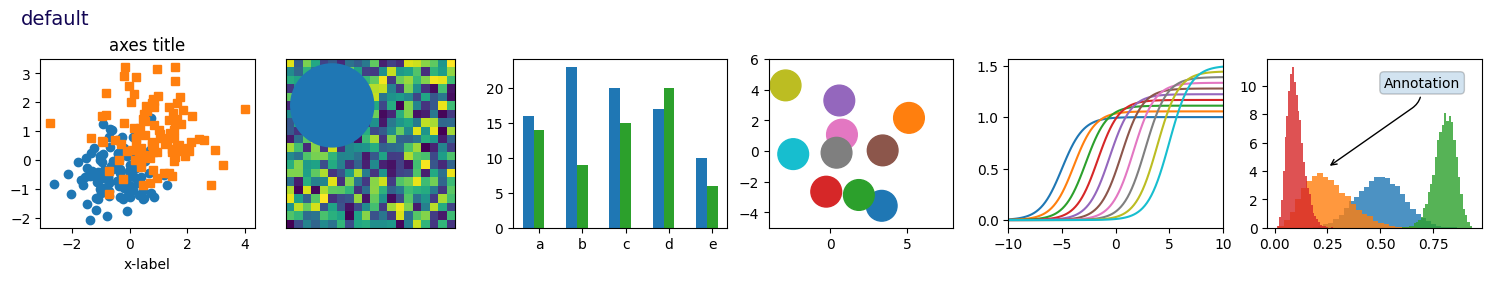

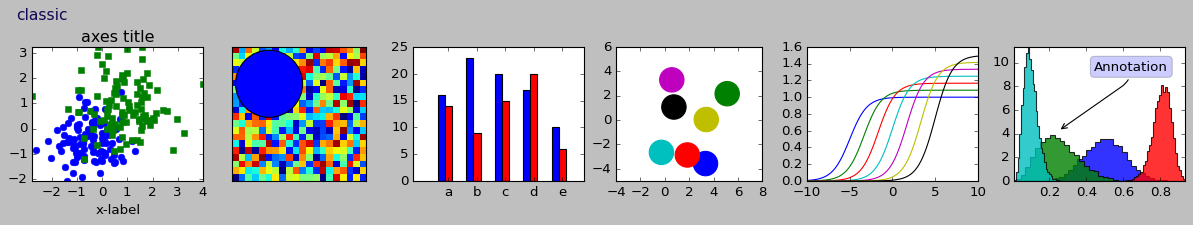

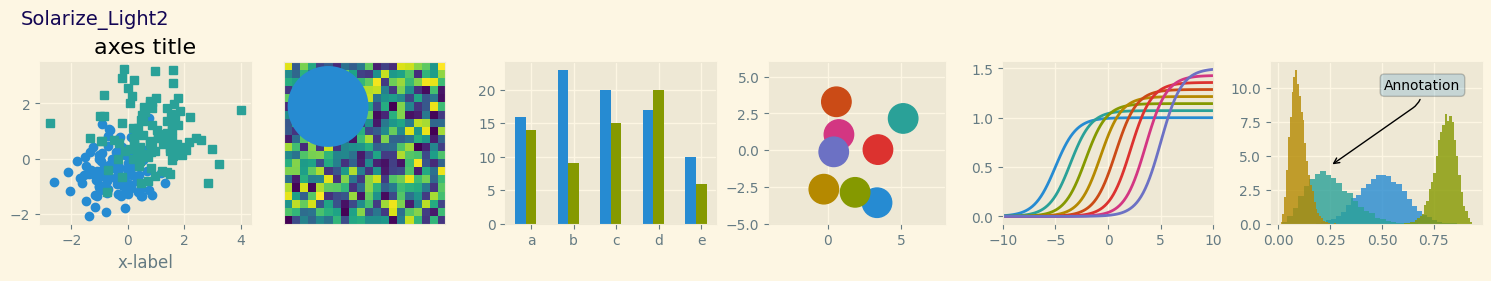

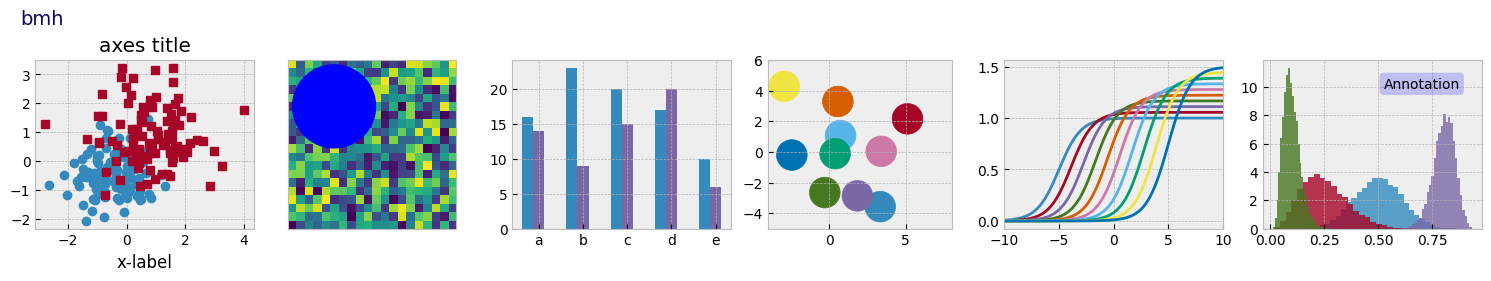

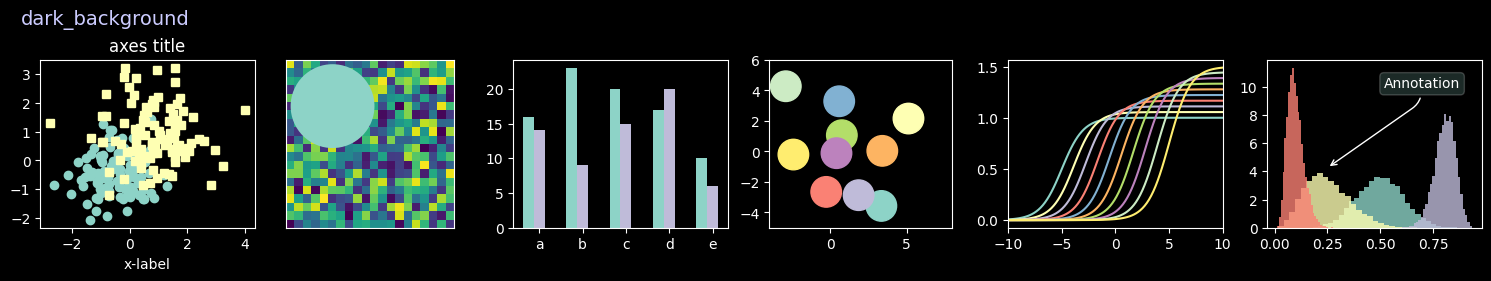

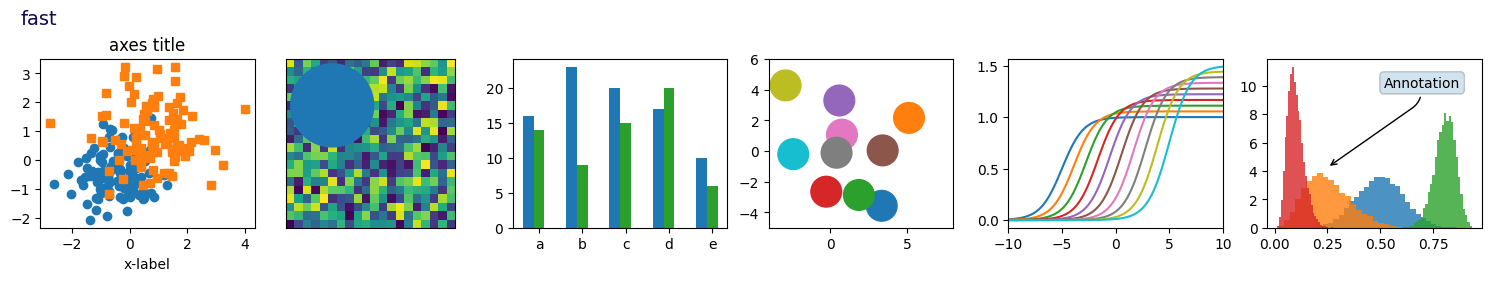

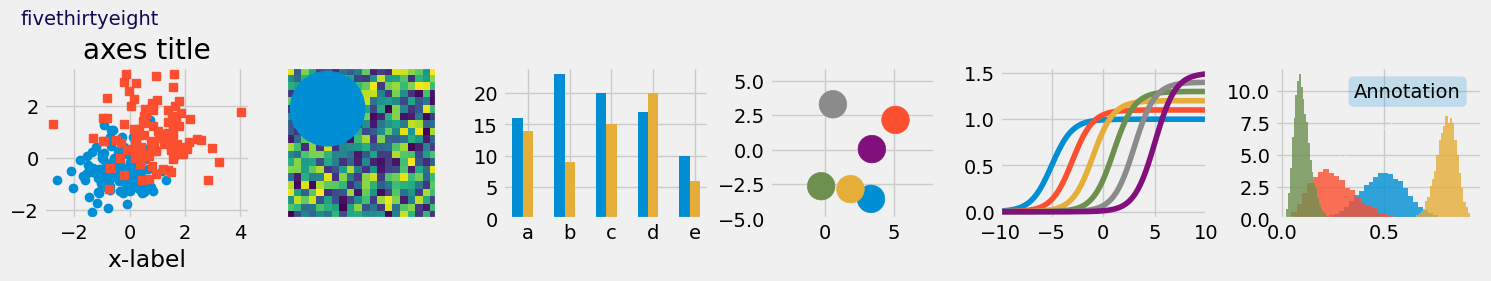

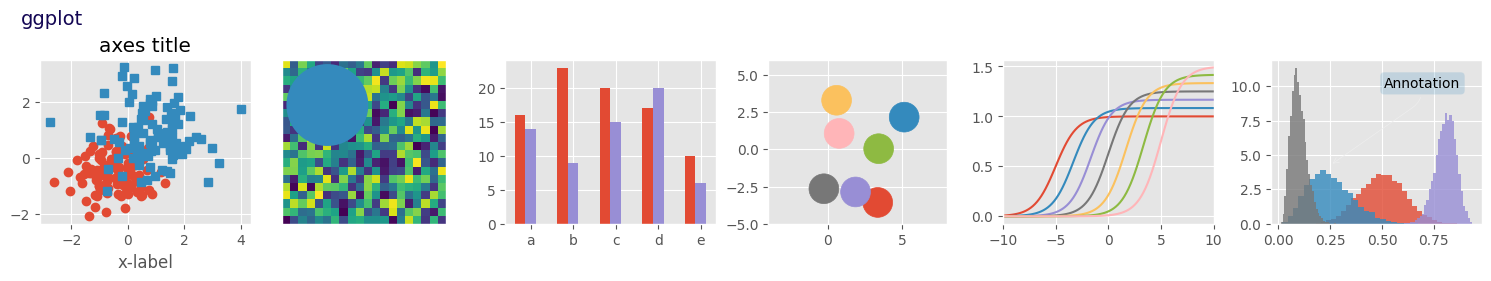

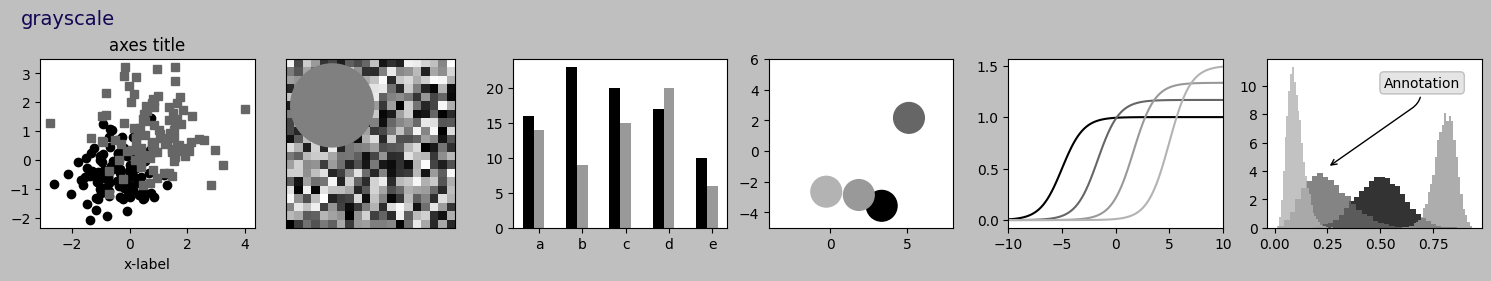

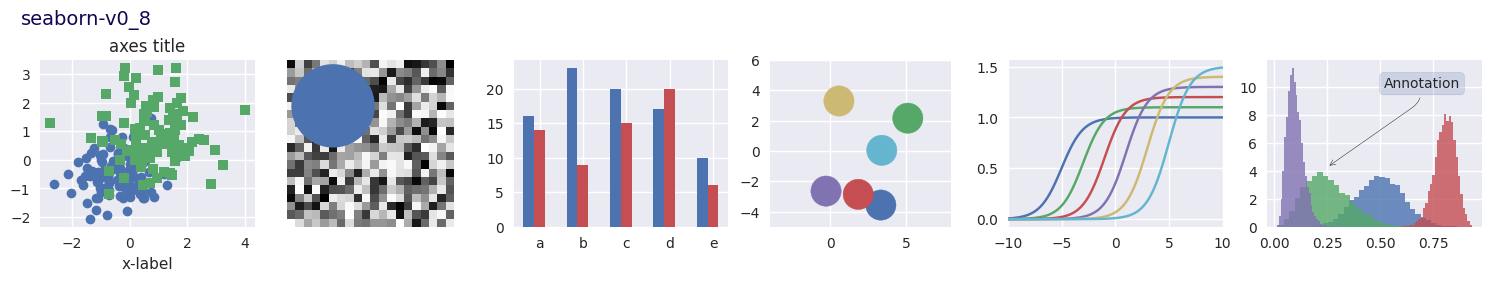

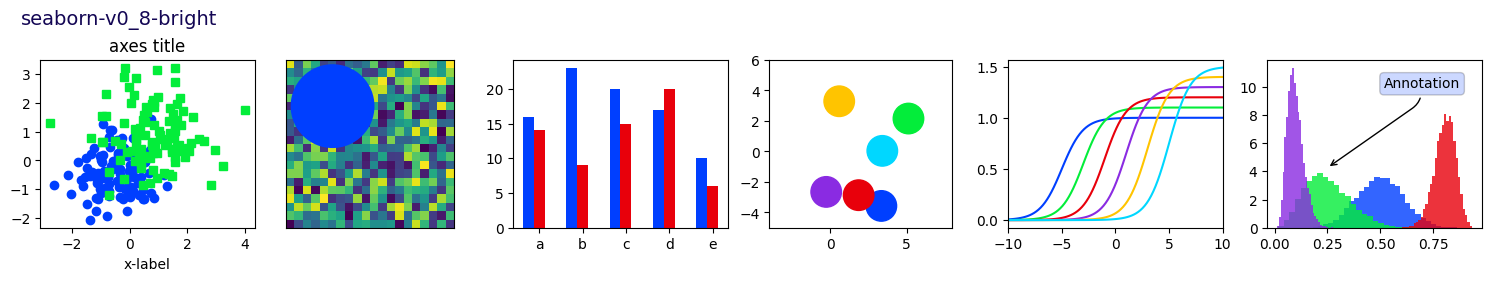

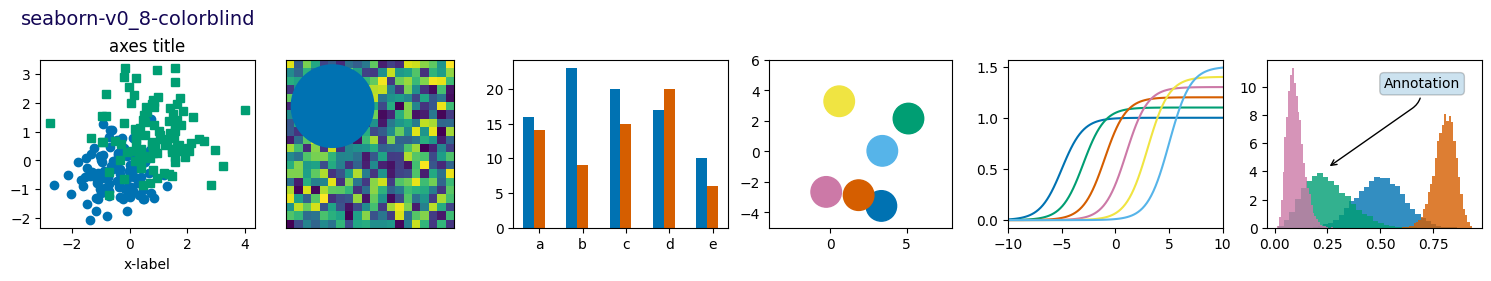

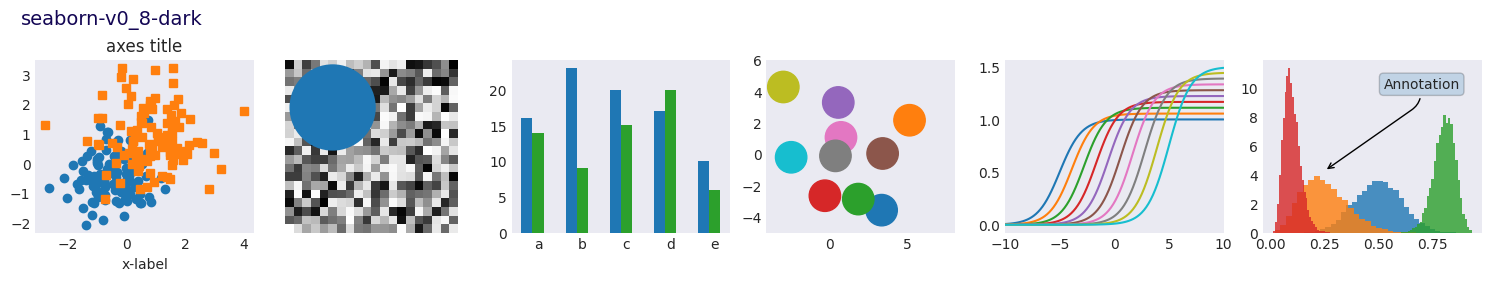

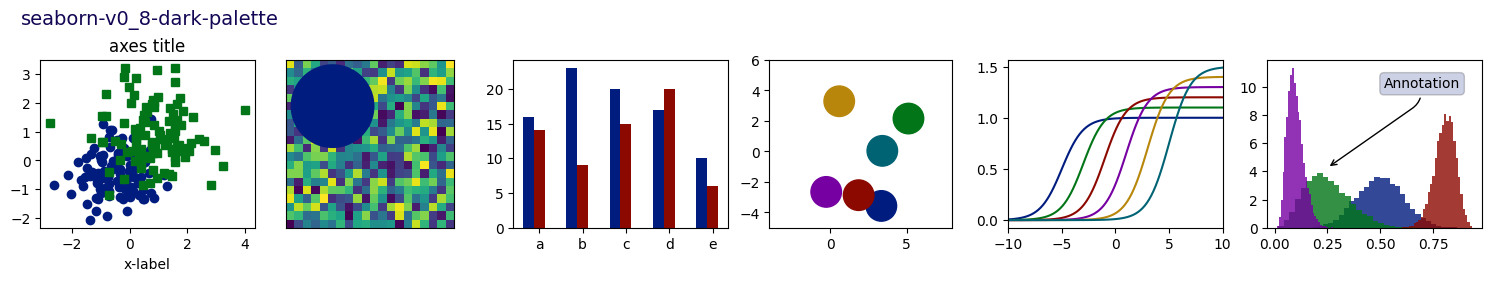

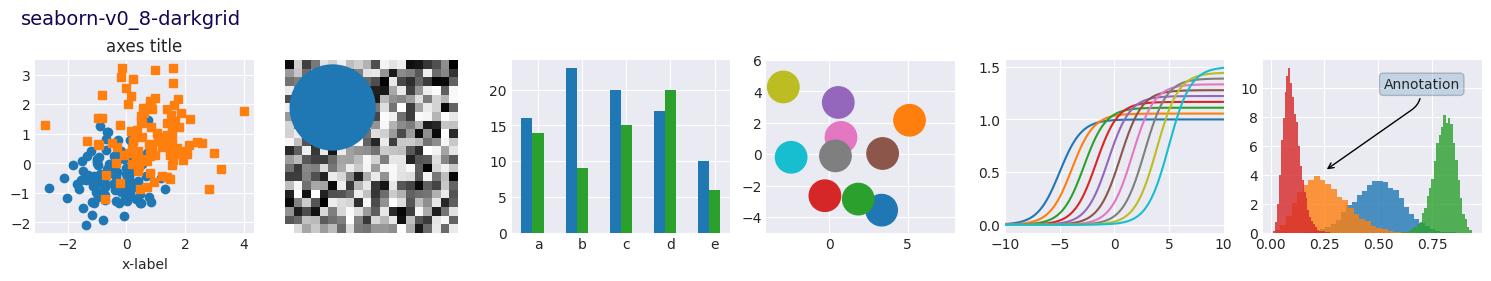

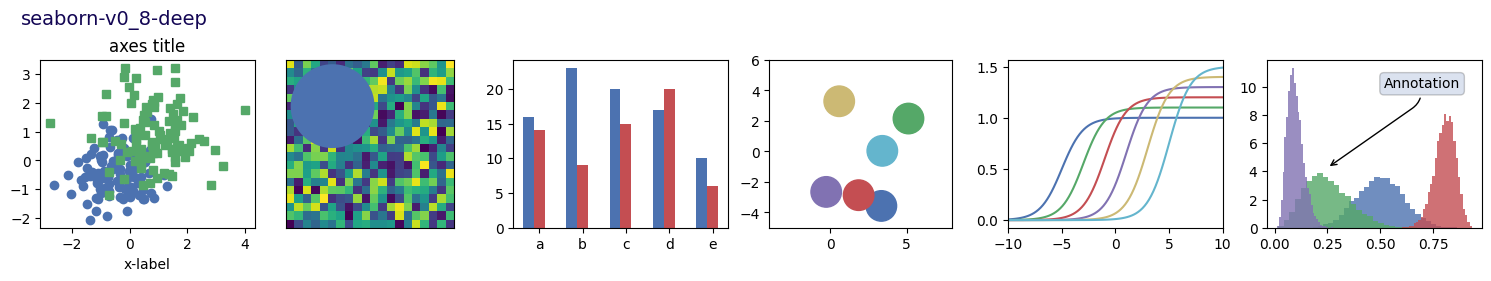

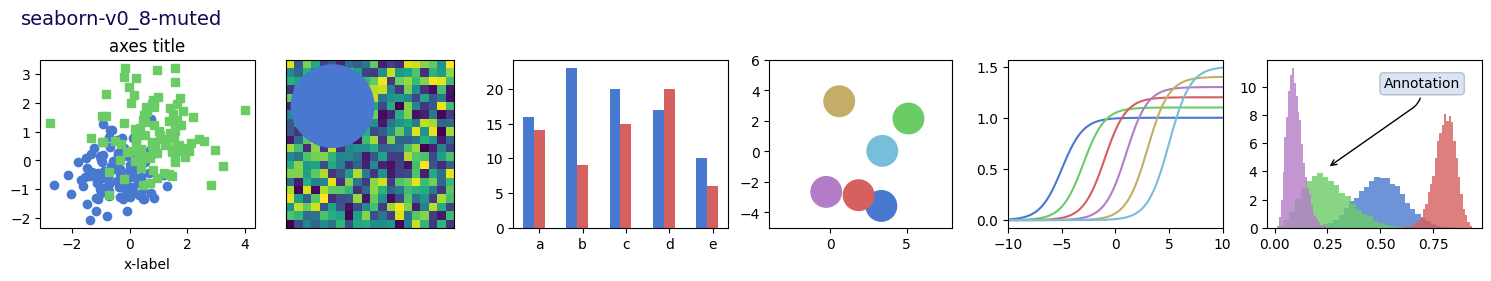

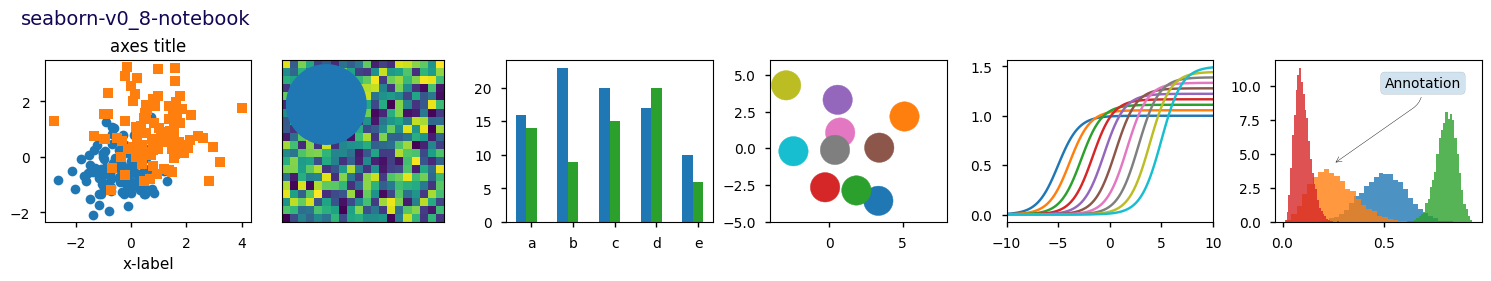

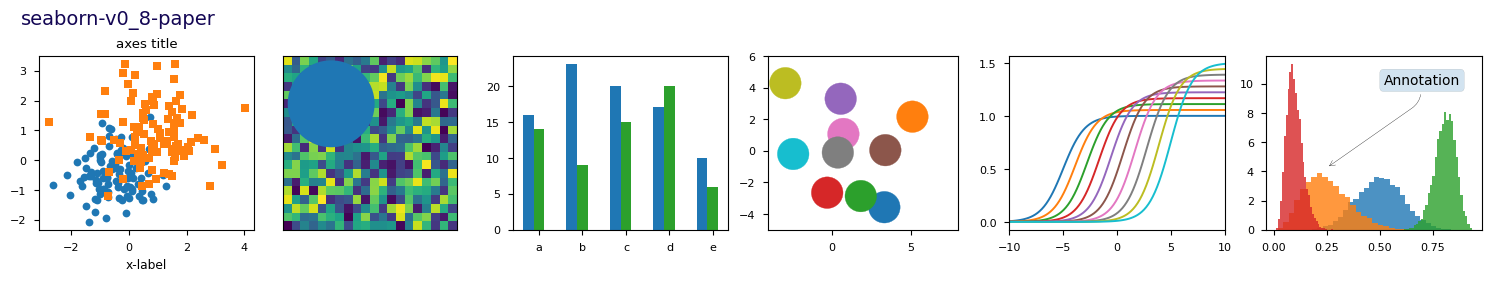

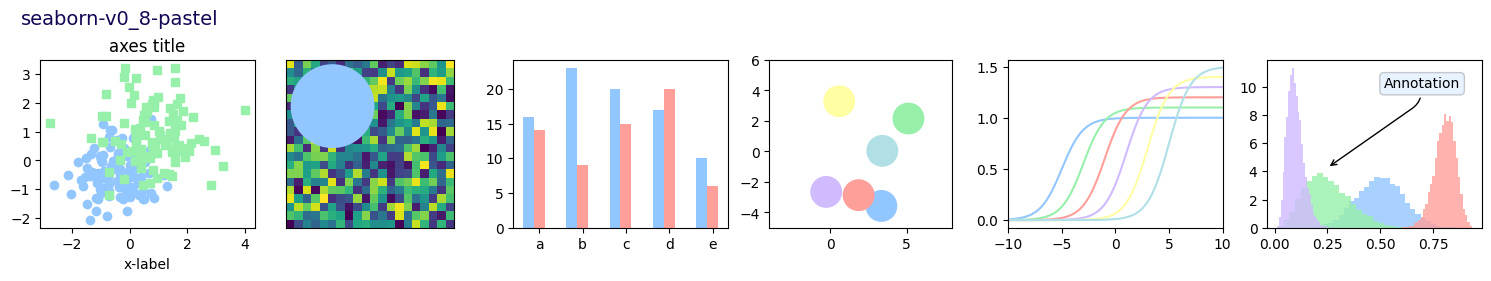

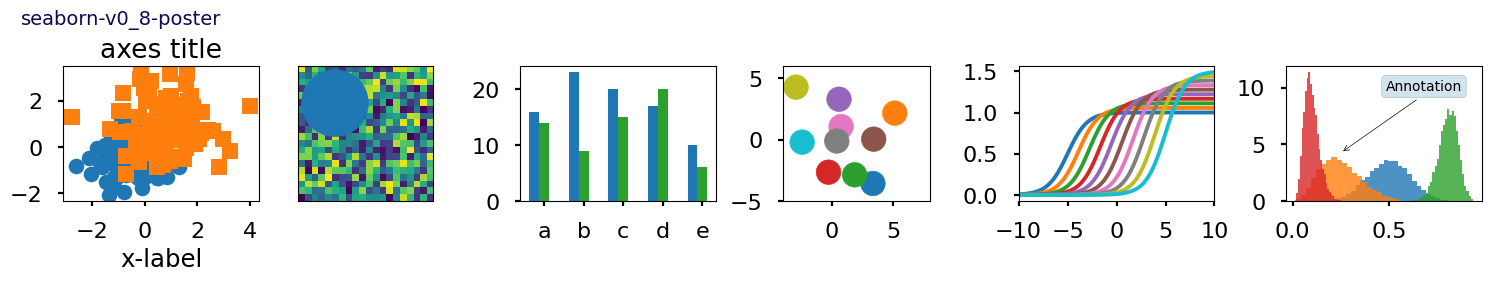

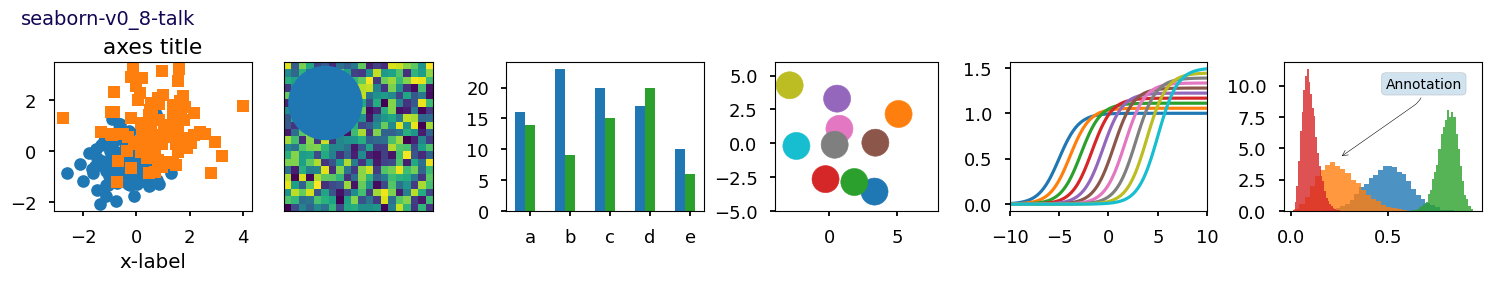

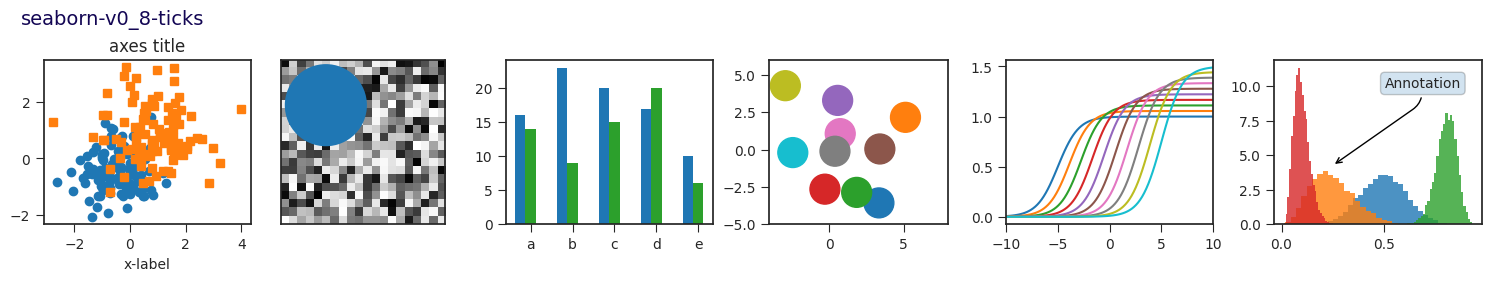

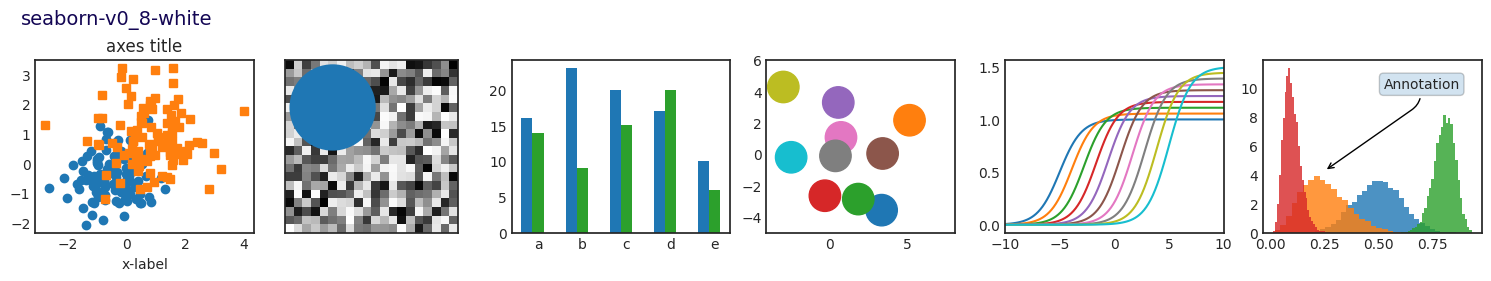

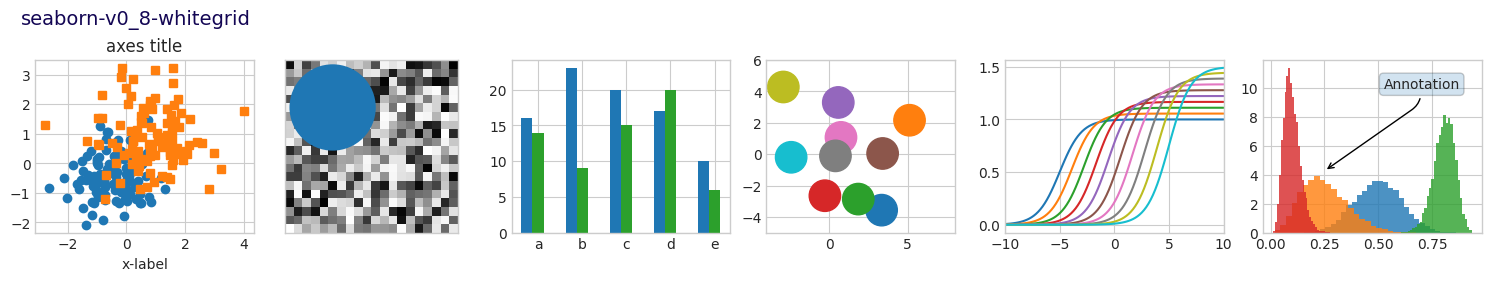

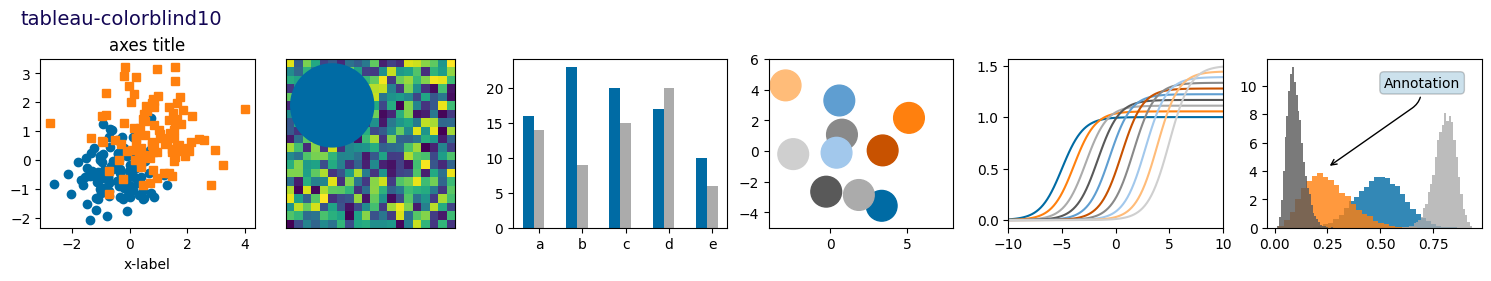

In [11]:
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            plot_figure(style_label=style_label)

plt.show()